# <font color='crimson'> Predict the Sales Price of a Car </font>

**Key Operations:**
- <font color='blue'>**Descriptive Analysis:**</font><font color='black'> Univariate & Bivariate Analyisis</font>
- <font color='blue'>**Feature Engineering:** </font><font color='black'>Data Preprocessing & Visualization</font>
- <font color='blue'>**Predictive Modeling :** </font><font color='black'>Linear Regression & Decision Tree</font>
- <font color='blue'>**Model Performance :** </font><font color='black'>Mean Square Error</font>
   </font>



## 1.0. Import Data and Libraries

###  1.1. Import Libraries 

In [346]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import math

### 1.2. Import Data 

In [347]:
df = pd.read_csv("E://DS/r_car_retail.csv")

print('Shape = ', df.shape)

print('Missing Values\n',df.isna().sum())

df.head(3)

Shape =  (804, 12)
Missing Values
 Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


## 2.0. Descriptive Statistics
### 2.1. Data Description

In [348]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,8.040000e+02,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21267.539911,2.242256e+04,5.276119,3.037313,3.527363,0.752488,0.679104,0.723881
std,10046.683969,7.395505e+04,1.449310,1.105562,0.850169,0.431836,0.467111,0.447355
min,-30392.750160,2.660000e+02,0.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14264.121355,1.462350e+04,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18007.358220,2.091350e+04,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26664.449080,2.521650e+04,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466720,2.103900e+06,16.000000,6.000000,4.000000,1.000000,1.000000,1.000000


Minimum Price is less than 0, thus may not be a correct entry. Therefore, entries with negetive profit is removed. 

In [349]:
df = df[df.Price>=0]

### 2.2. Data Visualization

#### 2.2.1. User-Defined Plotting Function

In [350]:
def plot_bar(data, column):
    temp = pd.DataFrame(data.groupby(column).count()['Price']).sort_values(by='Price', ascending=False)    
    temp.plot.bar()

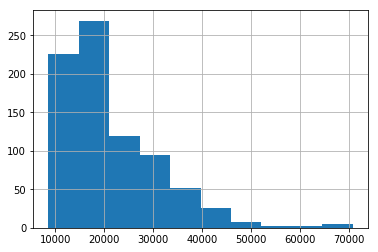

In [351]:
df['Price'].hist()

Most car prices is less than 35000 and concentrated at 20000. 

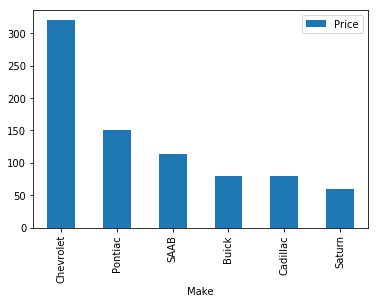

In [352]:
plot_bar(df, 'Make')        

Most people prefer Chevrolet the most

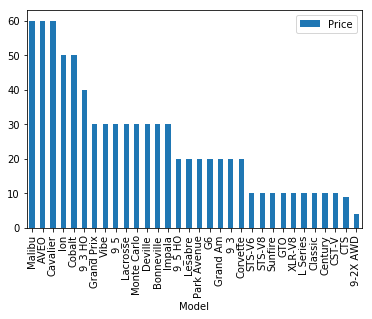

In [353]:
plot_bar(df, 'Model')        

**Malibu, AVEO & Cavalier** are most popular car models

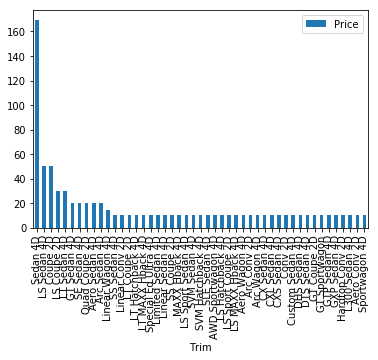

In [354]:
plot_bar(df, 'Trim')        

Sedan seems to be the most preferred car.

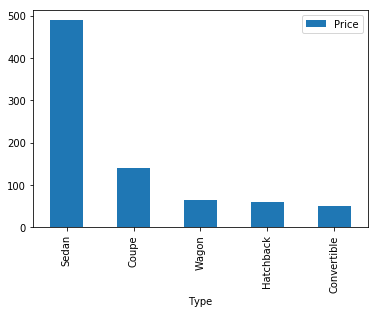

In [355]:
plot_bar(df, 'Type')    

<font color='crimson'>**NOTE:** Sedan seems to be the most preferred car.</font>

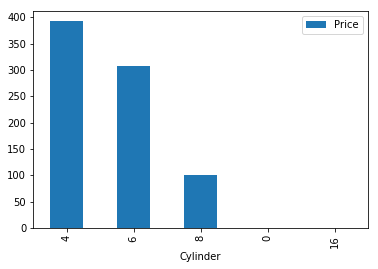

In [356]:
plot_bar(df, 'Cylinder')    

Most cars have 4 or 6 cylinders.

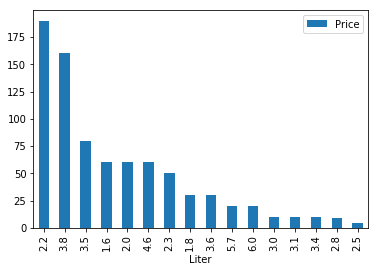

In [357]:
plot_bar(df, 'Liter') 

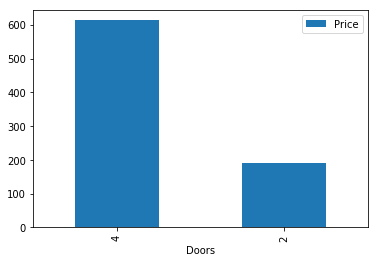

In [358]:
plot_bar(df, 'Doors')    

Most cars preferred have 4 doors, instead to 2 doors

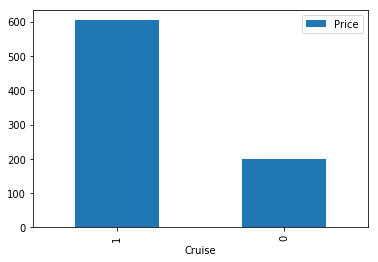

In [359]:
plot_bar(df, 'Cruise')    

Most people opt for Cruise Cars

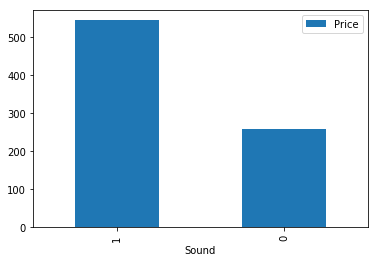

In [360]:
plot_bar(df, 'Sound')

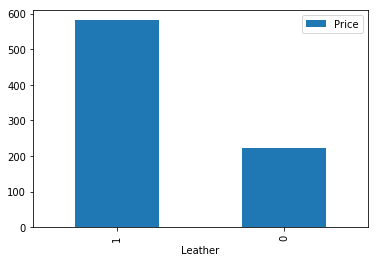

In [361]:
plot_bar(df, 'Leather')

Most cars have leather components installed.

#### 2.2.2. A new perspective 

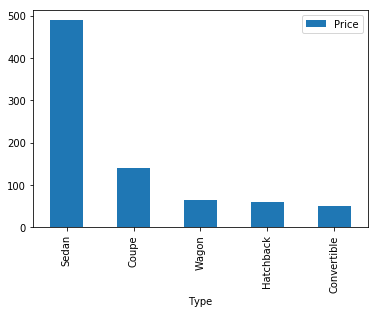

In [362]:
plot_bar(df,'Type')
temp_df = df[df.Type=='Sedan']

The analysis narrows to Sedan car type as it is mostly used. Next focus is on features available. 

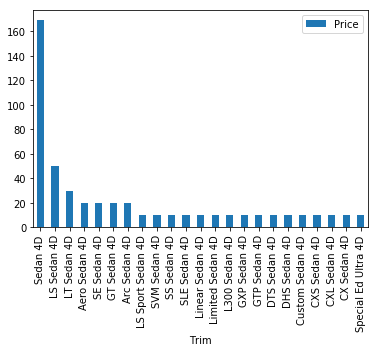

In [363]:
plot_bar(temp_df,'Trim')
temp_df = temp_df[temp_df.Trim=='Sedan 4D']

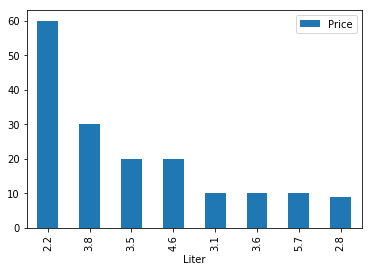

In [364]:
plot_bar(temp_df, 'Liter')
temp_df = temp_df.query('Liter==2.2 or Liter==3.8')

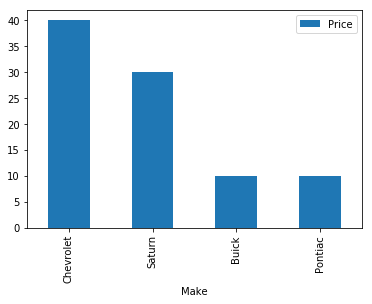

In [365]:
plot_bar(temp_df, 'Make')

**Interesting observation:**
- Chevloret and Saturn is of 2.2 liters and Buick and Pontiac is of 3.8 liters
- Both Buick and Pontiac have higher preference over Saturn, when Trim is less important to consumers. Therefore, more features does not imply an increase in sales.
- The cars with more features seems to have lower fuel capacity. Thus, consumers focussed on in-built technology may be also focussed on fuel savings.

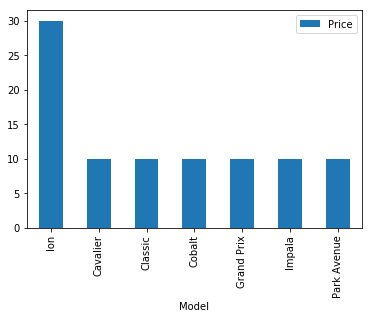

In [366]:
plot_bar(temp_df, 'Model')

- The most popular type of car is **Sedan** and the most popular model is **Ion**. 
- Remaining models seems to have almost similar sales figure. Therefore, sales revenue is required to gain more insights.

#### 2.2.3. Car Make and Model having the Highest Revenue

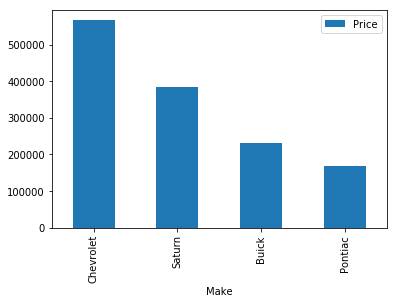

In [367]:
pd.DataFrame(temp_df.groupby('Make')['Price'].sum()).sort_values(by='Price', ascending=False).plot.bar()

- Chevrolet generates the highest revenue. 

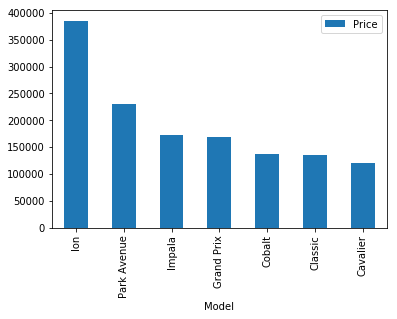

In [371]:
pd.DataFrame(temp_df.groupby('Model')['Price'].sum()).sort_values(by='Price', ascending=False).plot.bar()

- **Ion, Park Avenue and Impala** Car Models generates the top 3 revenues. 

### 2.3. Feature Correlation

          Price  Mileage  Cylinder  Liter  Doors  Cruise  Sound  Leather
Price     100.0      1.0      54.0   56.0  -14.0    43.0  -13.0     16.0
Mileage     1.0    100.0       2.0   -1.0    2.0     2.0   -5.0      2.0
Cylinder   54.0      2.0     100.0   93.0   -1.0    35.0  -10.0      8.0
Liter      56.0     -1.0      93.0  100.0   -8.0    38.0   -7.0      9.0
Doors     -14.0      2.0      -1.0   -8.0  100.0    -5.0   -6.0     -6.0
Cruise     43.0      2.0      35.0   38.0   -5.0   100.0   -9.0     -7.0
Sound     -13.0     -5.0     -10.0   -7.0   -6.0    -9.0  100.0     17.0
Leather    16.0      2.0       8.0    9.0   -6.0    -7.0   17.0    100.0


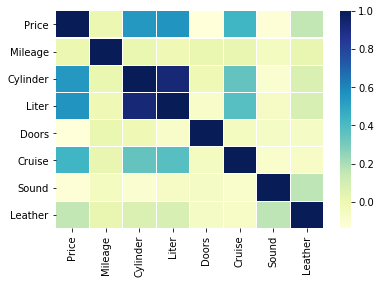

In [17]:
print(round(df.corr()*100))

sns.heatmap(df.corr(), cmap="YlGnBu", linewidth=0.1)

<font color='crimson'>**Note:** Cylinder and Liter is highly correlated *(positively)*. Thus, either one of the features can be dropped. </font>

### 2.4. Drop Corelated Column (Feature Engineering)

In [18]:
# Remove Co-Related Columns
df.drop(columns = ['Liter'], axis=1, inplace= True)
df.head(3)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,4,1,1,0


### 2.4. Continuous and Categorical Features

#### Get Unique Value Count

In [19]:
temp = pd.DataFrame([[col,len(df[col].unique())] for col in df.columns])
temp.columns = ['Feature', 'Unique']
temp

,Feature,Unique
0,Price,797
1,Mileage,790
2,Make,6
3,Model,32
4,Trim,47
5,Type,5
6,Cylinder,5
7,Doors,2
8,Cruise,2
9,Sound,2


#### <font color='crimson'>Save Categorical and Continuous Variables</font>

<font color='grey'>Identifying categorical variables helps to create dummy variables, i.e. via One-Hot Encoding. </font>

In [20]:
cat_var = ['Make','Model','Type','Cylinder','Doors','Cruise','Sound','Leather','Trim']
con_var = list(set(df.columns) - set(cat_var))

print('Categorical Variables\n',cat_var,'\n\n',
      'Continuous Variables\n', con_var)

Categorical Variables
 ['Make', 'Model', 'Type', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather', 'Trim'] 

 Continuous Variables
 ['Price', 'Mileage']


### 2.5. One Hot Encoding (Feature Engineering)

Create dummy columns for categorical variables. 

In [21]:
df = pd.get_dummies(df, columns = cat_var, drop_first = True)
df.head(3)

,Price,Mileage,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9_3,Model_9_3 HO,Model_9_5,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,17314.10313,8221,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17542.03608,9135,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,16218.84786,13196,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 3.0. Predictive Modelling

### 3.1. Dependent and Independent Variable 

In [22]:
# Get Training and Testing Data
X, y = df.iloc[:,1:], df.iloc[:,0]

### 3.2. Split Training and Testing Data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

#### Check the Distribution of Prediction for Training and Testing data

Prediction Distribution for Training Data



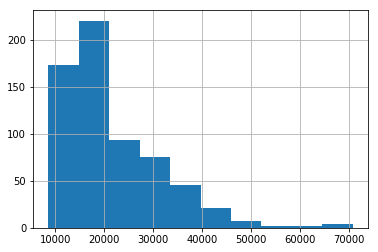

In [73]:
print('Prediction Distribution for Training Data\n')
y_train.hist()

Prediction Distribution for Testing Data



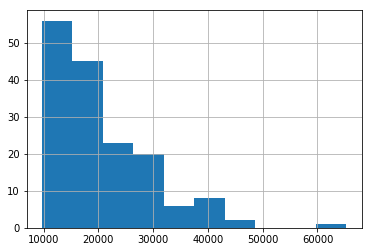

In [71]:
print('Prediction Distribution for Testing Data\n')
y_test.hist()

<font color = 'crimson'> **Note:** Prediction of Training and Testing data seems similar. Therefore, training data can be used to fit the model more accurately. Thus, a low bias and variance can be obtained while predicting the testing data. </font>

### 3.3. Model Training using Linear Regression

#### 3.3.1. Model Training

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Linear Regression Model\n',lr)

Linear Regression Model
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


#### 3.3.2. Model Prediction

In [31]:
y_pred = lr.predict(X_test)
print('Model Prediction\n',y_pred[:5])

Model Prediction
 [22348.12181897 15861.37659161 12650.27254869 15589.98402697
 28773.05436367]


#### 3.3.3. Model Performance

In [32]:
from sklearn.metrics import r2_score
print('Model Performance =',round(r2_score(y_test, y_pred)*100,2),'%')

Model Performance = 96.04 %


### 3.4. Model Training using Decision Tree 

#### *(Depth = 5)*

#### 3.4.1. Model Training

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state = 7)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=7, splitter='best')

#### 3.4.2. Model Prediction

In [63]:
y_pred = dt.predict(X_test)
print('Model Prediction\n',y_pred[:5])

Model Prediction
 [23956.99535071 13183.70175606 13183.70175606 13183.70175606
 28849.11817938]


#### 3.4.3. Model Performance

In [64]:
from sklearn.metrics import r2_score
print('Model Performance =',round(r2_score(y_test, y_pred)*100,2),'%')

Model Performance = 94.72 %


#### Improve Model Performance *(Depth = 10)*

#### 3.4.4. Model Training

In [59]:
dt = DecisionTreeRegressor(criterion='mse', max_depth=10, random_state = 7)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=7, splitter='best')

#### 3.4.5. Model Prediction

In [60]:
y_pred = dt.predict(X_test)
print('Model Prediction\n',y_pred[:5])

Model Prediction
 [26060.33535    16551.21957    12556.68378143 15802.65286
 28416.46167   ]


#### 3.4.6. Model Performance

In [61]:
from sklearn.metrics import r2_score
print('Model Performance =',round(r2_score(y_test, y_pred)*100,2),'%')

Model Performance = 97.85 %


**Comments:**

Prediction accuracy improved by increasing depth of decision tree. 

*Note:* Further increasing the depth of decision tree can overfit the model. 